In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data = pd.read_csv(url)

x = data['YearsExperience']
y = data['Salary']

In [6]:
#創建一個計算cost function的函式(計算各資料點和預測線之間的距離)
def compute_cost(x, y, w, b):
    y_pred = x*w + b
    cost = (y-y_pred)**2
    cost = cost.sum()/len(x)
    
    return cost

In [18]:
#只考慮w值對於cost fuction的影響之值
costs = []
for w in range(-100,101):
    cost = compute_cost(x,y,w,0)
    costs.append(cost)

print(costs)

[420951.08121212124, 413557.2063636363, 406228.88242424245, 398966.1093939394, 391768.8872727272, 384637.21606060606, 377571.0957575757, 370570.52636363637, 363635.5078787879, 356766.0403030302, 349962.12363636366, 343223.7578787879, 336550.94303030305, 329943.6790909091, 323401.966060606, 316925.8039393939, 310515.19272727263, 304170.13242424245, 297890.623030303, 291676.6645454545, 285528.25696969696, 279445.40030303027, 273428.0945454546, 267476.33969696966, 261590.1357575757, 255769.48272727273, 250014.38060606056, 244324.82939393938, 238700.82909090907, 233142.3796969697, 227649.4812121212, 222222.13363636364, 216860.33696969692, 211564.0912121212, 206333.39636363636, 201168.25242424244, 196068.6593939394, 191034.61727272722, 186066.12606060607, 181163.18575757576, 176325.79636363636, 171553.95787878786, 166847.67030303032, 162206.93363636362, 157631.7478787879, 153122.113030303, 148678.02909090905, 144299.49606060603, 139986.51393939395, 135739.0827272727, 131557.20242424242, 127

Text(0, 0.5, 'cost')

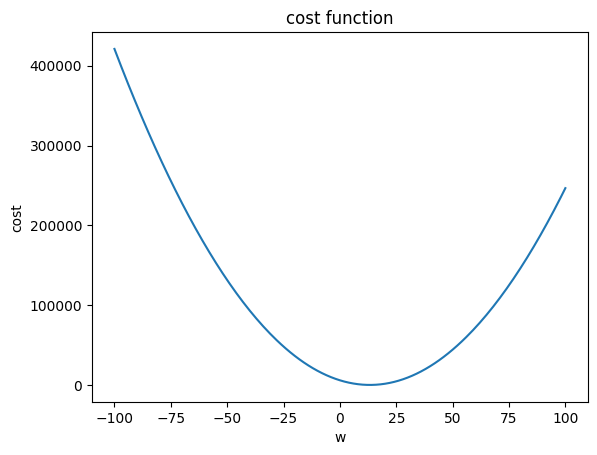

In [19]:
#製作w值對於cost function關係之圖形
import matplotlib.pyplot as plt

plt.plot(range(-100, 101), costs)
plt.title('cost function')
plt.xlabel('w')
plt.ylabel('cost')

In [40]:
#同時考慮w和b對於cost function的影響之值
import numpy as np

ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))

i=0
for w in ws:
    j=0
    for b in bs:
        cost = compute_cost(x,y,w,b)
        costs[i,j] = cost
        j=j+1
    i=i+1
    
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

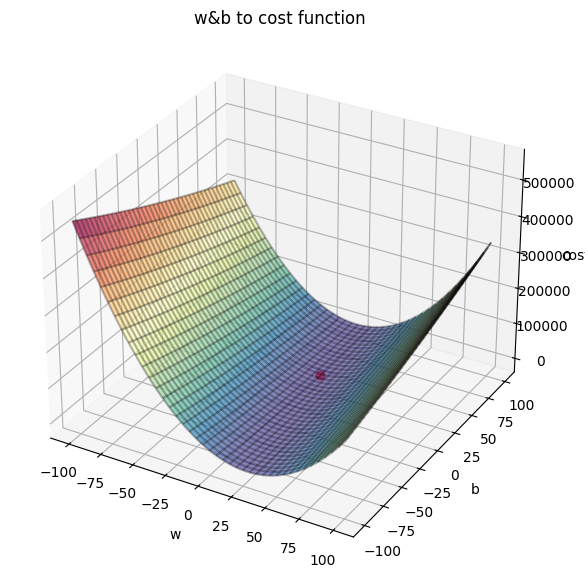

當w=[9], b=[29] 會有最小cost:[32.69484848]


In [61]:
plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.view_init(0,-120)#旋轉角度(上下旋轉角度, 左右旋轉角度)
b_grid, w_grid = np.meshgrid(bs, ws)#將一維陣列轉換為二維網格
ax.plot_surface(w_grid, b_grid, costs, cmap='Spectral_r', alpha=0.7)
#曲面本身(x軸的2D資料,y軸的2D資料,z軸的2D資料,顏色,透明度)
ax.plot_wireframe(w_grid, b_grid, costs, color='black', alpha=0.3)
#曲面邊框(x軸的2D資料,y軸的2D資料,z軸的2D資料,顏色,透明度)
ax.set_title('w&b to cost function')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('cost')

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color='red', s=40)
plt.show( )
print(f'當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}')